Importação das libs

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Função que calcula as métricas

In [37]:
def calculate_classification_metrics(confusion_matrix):
  """Texto para ajuda.
  true_positives: VP.
  false_positives: FP.
  false_negatives: FN.
  true_negatives: VN.

  sensitivity: Sensibilidade ou S = VP / (VP + FN)
  specificity: Especificidade = VN / (FP + VN)
  accuracy: Acurácia = (VP + VN) / N
  precision: Precisão ou P = VP / (VP + FP)
  f_score: F-Score = 2 * (P * S) / (P + S)
  """
  total_samples = np.sum(confusion_matrix)
  true_positives = np.diag(confusion_matrix)
  false_positives = np.sum(confusion_matrix, axis=0) - true_positives
  false_negatives = np.sum(confusion_matrix, axis=1) - true_positives
  true_negatives = total_samples - (true_positives + false_positives + false_negatives)


  accuracy = np.sum(true_positives) / total_samples
  sensitivity = true_positives / (true_positives + false_negatives)
  specificity = true_negatives / (true_negatives + false_positives)
  precision = true_positives / (true_positives + false_positives)
  f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

  return {
      "accuracy": accuracy,
      "sensitivity": sensitivity,
      "specificity": specificity,
      "precision": precision,
      "f_score": f_score
  }

Função para mostrar o gráfico da matriz de confusão

In [38]:
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Acerto')
    plt.show()

Função para mostrar uma única métrica graficamente

In [39]:
def plot_single_metric(metric_values, metric_name, class_names):
    plt.figure(figsize=(10, 7))
    plt.bar(class_names, metric_values, color='skyblue')
    plt.ylim(0, 1)
    plt.title(metric_name)
    plt.ylabel('Score')
    for i, value in enumerate(metric_values):
        plt.text(i, value + 0.02, f"{value:.3f}", ha='center', va='bottom')
    plt.xticks(rotation=90)
    plt.show()

Função para mostrar todas as métricas (não foi usada pois ficava uma célula de saída muito grande)

In [40]:
def plot_all_metrics(metrics, class_names):
    plot_single_metric([metrics['accuracy']], 'Acurácia', ['Geral'])
    plot_single_metric(metrics['sensitivity'], 'Sensibilidade', class_names)
    plot_single_metric(metrics['specificity'], 'Especificidade', class_names)
    plot_single_metric(metrics['precision'], 'Precisão', class_names)
    plot_single_metric(metrics['f_score'], 'F-Score', class_names)

In [41]:
num_classes = 10
class_names = [f"Classe {i}" for i in range(num_classes)]

In [42]:
confusion_matrix = np.random.randint(0, 100, size=(num_classes, num_classes))

In [43]:
metrics = calculate_classification_metrics(confusion_matrix)

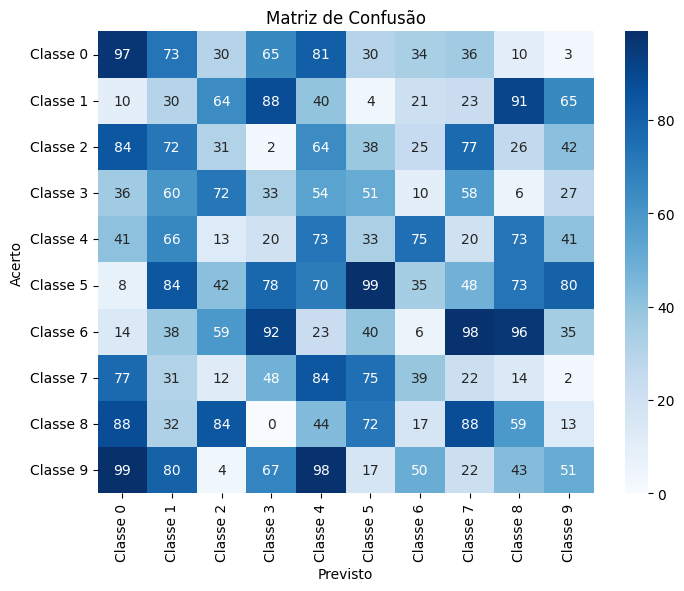

In [44]:
plot_confusion_matrix(confusion_matrix, class_names)

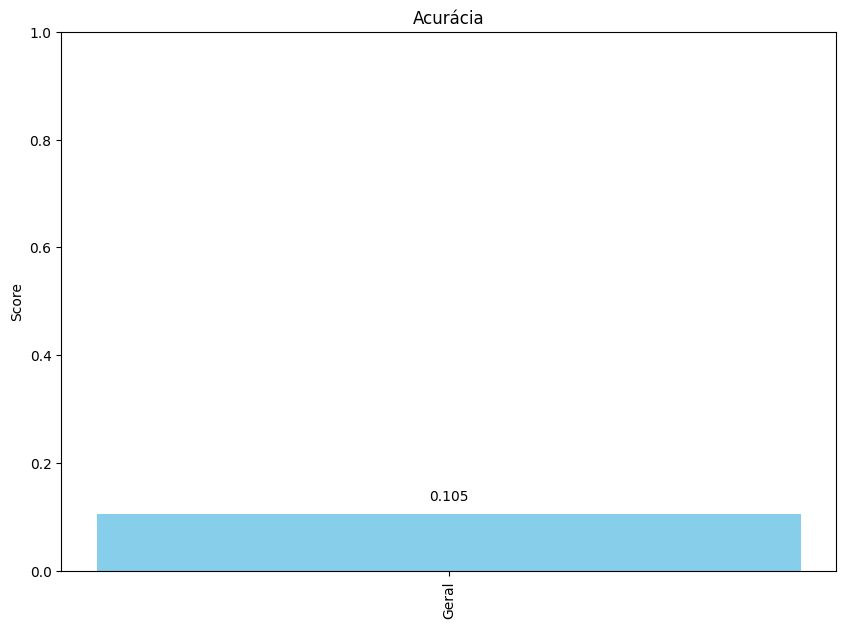

In [45]:
plot_single_metric([metrics['accuracy']], 'Acurácia', ['Geral'])

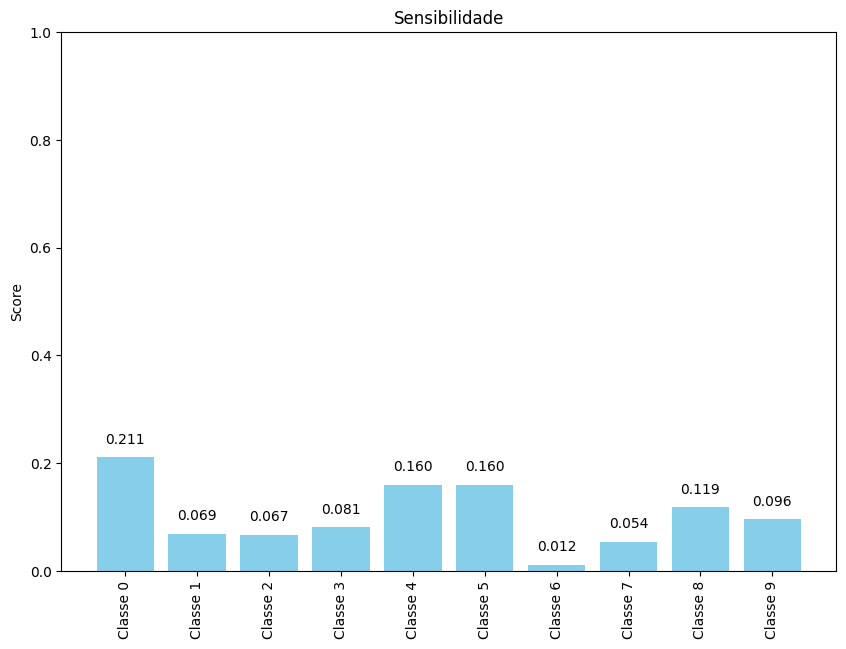

In [46]:
plot_single_metric(metrics['sensitivity'], 'Sensibilidade', class_names)

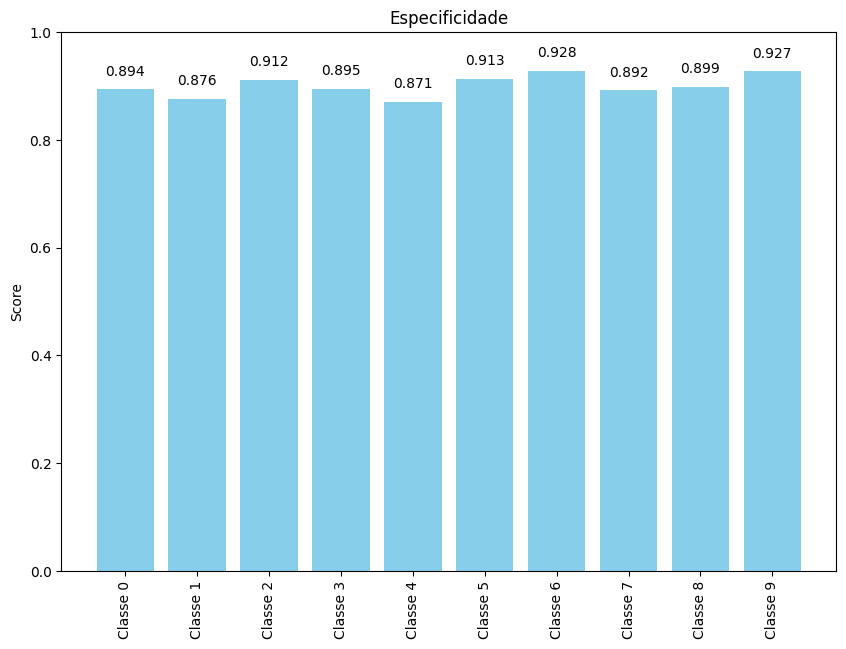

In [47]:
plot_single_metric(metrics['specificity'], 'Especificidade', class_names)

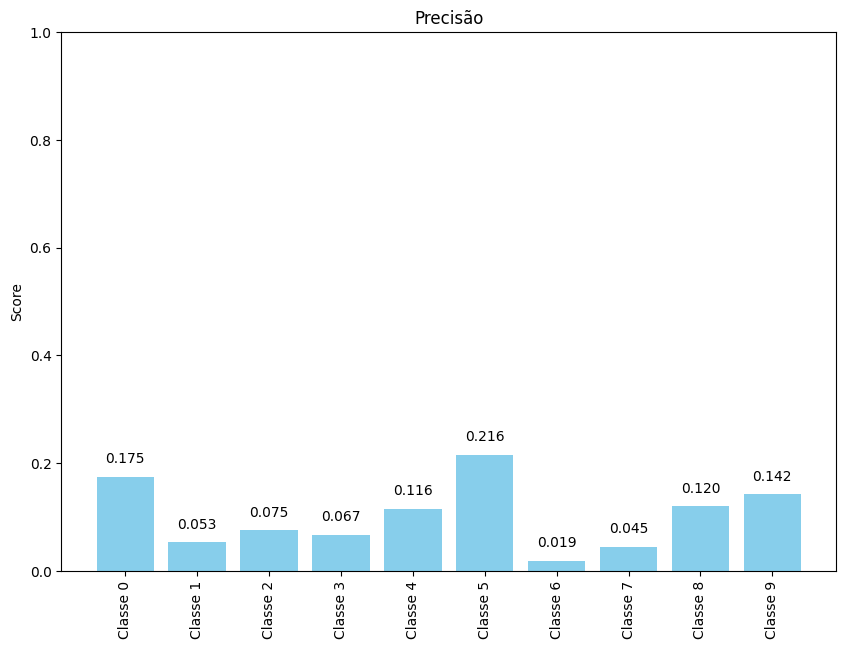

In [48]:
plot_single_metric(metrics['precision'], 'Precisão', class_names)

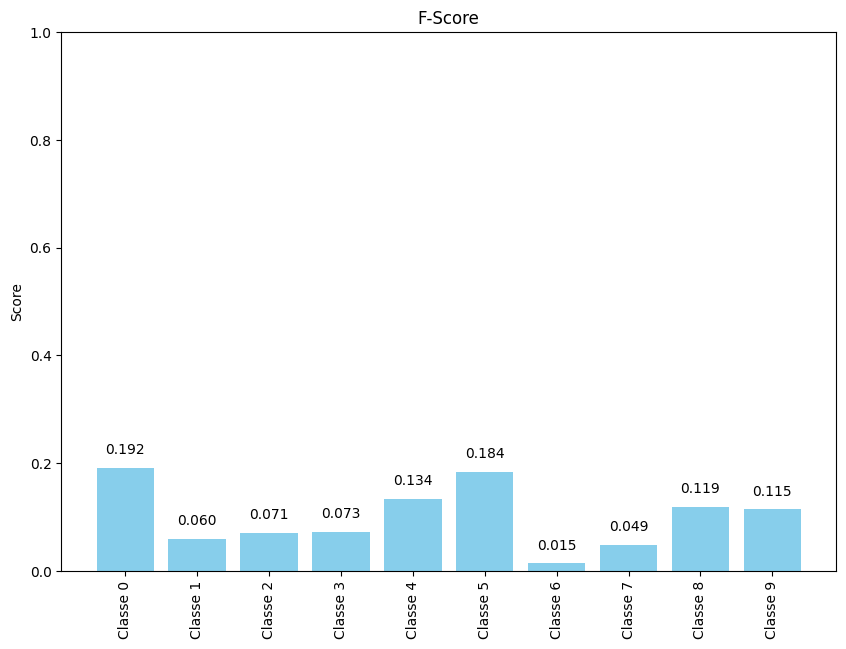

In [49]:
plot_single_metric(metrics['f_score'], 'F-Score', class_names)